In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [41]:
df = pd.read_csv("startup_data.csv", encoding="latin1")

In [5]:
df

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011,3,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
468,Company469,Failed,No Info,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
469,Company470,Failed,2010,4,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
470,Company471,Failed,2009,5,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info


In [6]:
df.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


In [13]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

Number of  of Partners of company                                                                                                    60.169492
Number of  of Research publications                                                                                                  52.966102
Employees count MoM change                                                                                                           43.432203
Top management similarity                                                                                                            42.161017
Gartner hype cycle stage                                                                                                             36.440678
                                                                                                                                       ...    
Machine Learning based business                                                                                                       0.000000

In [14]:
df.columns

Index(['Company_Name', 'Dependent-Company Status', 'year of founding',
       'Age of company in years', 'Internet Activity Score',
       'Short Description of company profile', 'Industry of company',
       'Focus functions of company', 'Investors', 'Employee Count',
       ...
       'Percent_skill_Data Science', 'Percent_skill_Business Strategy',
       'Percent_skill_Product Management', 'Percent_skill_Sales',
       'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
       'Percent_skill_Finance', 'Percent_skill_Investment', 'Renown score'],
      dtype='object', length=116)

In [15]:
target = "Dependent-Company Status"

In [19]:
assert df[target].isna().sum() == 0, "Target variable contains missing values"

## Cardinality

In [24]:
df.nunique().sort_values(ascending=False) / len(df) * 100

Company_Name                                        100.000000
Investors                                            67.584746
Short Description of company profile                 66.313559
google page rank of company website                  65.889831
Last Funding Date                                    60.169492
                                                       ...    
Solutions offered                                     0.635593
Invested through global incubation competitions?      0.635593
Experience in Fortune 500 organizations               0.635593
Barriers of entry for the competitors                 0.423729
Dependent-Company Status                              0.423729
Length: 116, dtype: float64

In [25]:
df["Industry of company"]

0                                                 NaN
1              Market Research|Marketing|Crowdfunding
2      Analytics|Cloud Computing|Software Development
3                                    Mobile|Analytics
4             Analytics|Marketing|Enterprise Software
                            ...                      
467                                        E-Commerce
468                                               NaN
469                              Analytics|E-Commerce
470                               Analytics|Marketing
471                              Analytics|Healthcare
Name: Industry of company, Length: 472, dtype: object

In [42]:

# df["Age of company in years"].replace("No Info", pd.NA, inplace=True)
df["year of founding"].replace("No Info", np.nan, inplace=True)

C:\Users\hayk_\AppData\Local\Temp\ipykernel_14708\4088562217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["year of founding"].replace("No Info", np.nan, inplace=True)


In [43]:
df["Age of company in years"].value_counts()

Age of company in years
4          76
2          73
3          70
5          49
7          42
6          33
9          23
1          20
No Info    15
8          14
14          4
12          3
11          2
10          2
15          1
17          1
Name: count, dtype: int64

In [48]:
df["year of founding"] = df["year of founding"].astype("float")

In [49]:
df.describe()

,year of founding,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,413.000000,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,2009.394673,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,2.607247,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,1997.000000,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,2008.000000,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,2010.000000,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,2011.000000,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,2013.000000,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [59]:
df["Focus functions of company"].str.lower().value_counts()

Focus functions of company
marketing                                     62
operations                                    51
analytics                                     33
operation                                     25
technology                                    21
                                              ..
it & sales                                     1
development, marketing, and administration     1
data collection                                1
social advertising                             1
socialmedia campaign                           1
Name: count, Length: 145, dtype: int64

In [60]:
df["Focus functions of company"] = df["Focus functions of company"].str.lower()


industries = ["marketing", "sales", "operation", "social", "software", "web"]

for industry in industries:
    df[f"industry_{industry}"] = df["Focus functions of company"].str.contains(industry, na=False)

In [63]:
df

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,industry_marketing,industry_sales,industry_operation,industry_social,industry_software,industry_web
0,Company1,Success,NaN,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,False,False,True,False,False,False
1,Company2,Success,2011.0,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"marketing, sales",NaN,NaN,...,0,0,0,8,True,True,False,False,False,False
2,Company3,Success,2011.0,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,0,0,0,9,False,False,True,False,False,False
3,Company4,Success,2009.0,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,marketing & sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,5,True,True,False,False,False,False
4,Company5,Success,2010.0,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,marketing & sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,6,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011.0,3,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,No Info,No Info,No Info,No Info,False,False,False,False,False,False
468,Company469,Failed,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0,0,0,0,False,False,False,False,False,True
469,Company470,Failed,2010.0,4,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,campaign management,NaN,0.0,...,No Info,No Info,No Info,No Info,False,False,False,False,False,False
470,Company471,Failed,2009.0,5,0.0,Social Media Publishing and Analytics,Analytics|Marketing,socialmedia campaign,NaN,NaN,...,No Info,No Info,No Info,No Info,False,False,False,True,False,False


In [65]:
NUMERIC_COLS = ["year of founding", 'Internet Activity Score', "Employee Count"]
CATEGORICAL_COLS = ["Continent of company", "Country of company"]
BINARY_COLS = [col for col in df.columns if col.startswith("industry_")]

In [66]:
df_wip = df[NUMERIC_COLS + CATEGORICAL_COLS + BINARY_COLS + [target]].copy() # work in progress

In [68]:
df_wip.isna().sum()

year of founding             59
Internet Activity Score      65
Employee Count              166
Continent of company         71
Country of company           71
industry_marketing            0
industry_sales                0
industry_operation            0
industry_social               0
industry_software             0
industry_web                  0
Dependent-Company Status      0
dtype: int64

In [69]:
del df_wip["Employee Count"]

In [70]:
df_wip["Country of company"].fillna("Unknown", inplace=True)
df_wip["Continent of company"].fillna("Unknown", inplace=True)

C:\Users\hayk_\AppData\Local\Temp\ipykernel_14708\2967286780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wip["Continent of company"].fillna("Unknown", inplace=True)


<Axes: >

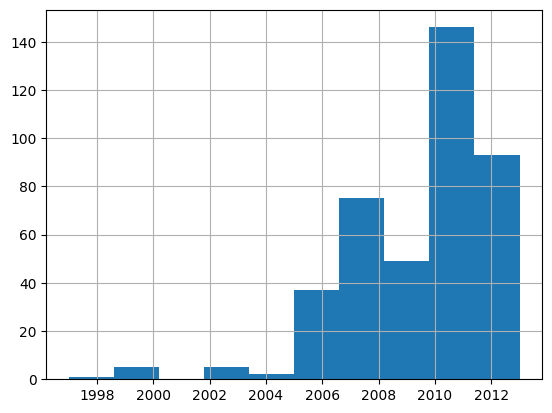

In [71]:
df_wip["year of founding"].hist()

In [72]:
df_wip["year of founding"].fillna(df_wip["year of founding"].median(), inplace=True)
df_wip["Internet Activity Score"].fillna(df_wip["Internet Activity Score"].median(), inplace=True)

C:\Users\hayk_\AppData\Local\Temp\ipykernel_14708\1528331094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wip["year of founding"].fillna(df_wip["year of founding"].median(), inplace=True)
C:\Users\hayk_\AppData\Local\Temp\ipykernel_14708\1528331094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [74]:
assert df_wip.isna().sum().sum() == 0, "There are still missing values"

In [75]:
df_wip.to_csv("startup_data_cleaned.csv", index=False)

In [76]:
df["Country of company"]

Count of companies by status:
Dependent-Company Status
Success    305
Failed     167
Name: count, dtype: int64

Percentage of companies by status:
Dependent-Company Status
Success    64.618644
Failed     35.381356
Name: proportion, dtype: float64


# Most Successful Continent Analysis

In [78]:
# Calculate success rate and sample size by continent
continent_stats = df_wip.groupby("Continent of company")[target].agg([
    ('Success Rate (%)', lambda x: (x == "Success").sum() / len(x) * 100),
    ('Sample Size', 'count'),
    ('Successes', lambda x: (x == "Success").sum())
]).sort_values('Success Rate (%)', ascending=False)

print("Success rate by continent with sample sizes:")
print(continent_stats)

# Visualize the results with sample size information
fig = px.bar(
    continent_stats,
    x=continent_stats.index,
    y='Success Rate (%)',
    text=continent_stats['Sample Size'].apply(lambda x: f'n={x}'),
    labels={"x": "Continent", "Success Rate (%)": "Success Rate (%)"},
    title="Startup Success Rate by Continent (with sample sizes)"
)
fig.update_traces(textposition='outside')
fig.show()

Success rate by continent with sample sizes:
                      Success Rate (%)  Sample Size  Successes
Continent of company                                          
South America               100.000000            2          2
Europe                       84.210526           76         64
Asia                         73.333333           15         11
North America                66.233766          308        204
Unknown                      33.802817           71         24
